Moved from (39, 39) to (4, 31)
Moved from (39, 39) to (12, 16)
Moved from (39, 39) to (37, 27)
Moved from (39, 39) to (12, 10)
repeat
Moved from (39, 39) to (36, 35)
Moved from (39, 39) to (18, 4)
Moved from (39, 39) to (8, 19)
Moved from (39, 39) to (36, 23)
Moved from (39, 39) to (20, 0)
Moved from (39, 39) to (12, 2)
repeat
Moved from (39, 39) to (34, 23)
Moved from (39, 39) to (38, 29)
Moved from (39, 39) to (34, 16)
Moved from (39, 39) to (11, 31)
Moved from (39, 39) to (33, 37)
repeat
repeat
Moved from (39, 39) to (21, 18)
Moved from (39, 39) to (0, 38)
Moved from (39, 39) to (26, 15)
Moved from (39, 39) to (10, 36)
Moved from (39, 39) to (36, 10)
Moved from (39, 39) to (37, 36)
repeat
Moved from (39, 39) to (31, 32)
repeat
repeat
Moved from (39, 39) to (31, 32)
Moved from (39, 39) to (10, 34)
repeat
Moved from (39, 39) to (38, 36)
Moved from (39, 39) to (18, 4)
Moved from (39, 39) to (38, 30)
Moved from (39, 39) to (4, 21)
Moved from (39, 39) to (7, 28)
Moved from (39, 39) to (3

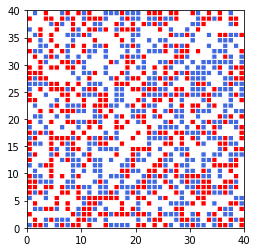

In [1]:
'''
Using NxN grid instead of analogue. Agent checks the 8 squares around it. World wraps around
'''
from matplotlib import pyplot as plt
import random

from matplotlib.colors import ListedColormap
import numpy as np

fill_fraction = 0.6
dim = 40 #size of NxN grid
happiness_threshold = 0.3
neighbourhood_size = 1





class Canvas:
    def __init__(self, dim, fill_fraction, happiness_threshold, neighbourhood_size):
        self.dim = dim
        self.fill_fraction = fill_fraction
        self.happiness_threshold = happiness_threshold
        self.neighbourhood_size = neighbourhood_size #how many tiles away the neighbourhood stretches

        probs = [(fill_fraction/2), (fill_fraction/2), 1- fill_fraction]
        size = int(self.dim**2)
        self.canvas = np.random.choice([-1, 1, 0], size = size, p = probs)
        self.canvas = np.reshape(self.canvas, (self.dim, self.dim))

        
    def check_neighbourhood(self, row, col): #returns list of how many plus and minus and blank there are.
        total_list = [0,0,0] #(minus, plus, empty)
        if self.canvas[row,col] == -1:
            total_list[0] = -1
            #stops it counting itself 
        else:
            total_list[1] = -1
        neighbourhood = self.canvas[row - self.neighbourhood_size: row + self.neighbourhood_size, col - self.neighbourhood_size:col+self.neighbourhood_size]
        for x in neighbourhood:
            for y in x:
                if y == -1:
                    total_list[0] += 1
                elif y == 1:
                    total_list[1] += 1
                elif y == 0:
                    total_list[2] += 1
        return(total_list)
    
    def get_percentage(self, row, col):
        n_minus = self.check_neighbourhood(row, col)[0]
        n_plus = self.check_neighbourhood(row, col)[1]
        if n_minus + n_plus == 0:
            percentage = 1
        else:
            percentage = (n_minus if self.canvas[row][col] == -1 else n_plus)/(n_minus + n_plus)
        return percentage
                
    def update(self):
        for (row, col), n in np.ndenumerate(self.canvas):
            if self.canvas[row, col] != 0: #don't check empty squares
                percentage = self.get_percentage(row, col)
                if percentage < self.happiness_threshold: #unhappy so move
                    empty_squares = []
                    for (row, col), self.canvas[row, col] in np.ndenumerate(self.canvas):
                        if self.canvas[row, col] == 0:
                            empty_squares += [(row,col)]
                    for x in empty_squares: #find empty square to move to 
                        row2, col2= random.choice(empty_squares)
                        percentage = self.get_percentage(row2,col2)
                        if percentage > self.happiness_threshold:
                            self.canvas[row][col] = 0
                            self.canvas[row2][col2] = self.canvas[row, col]
                            print(f'Moved from {row, col} to {row2, col2}')
                            break
                        else:
                            print('repeat')
    def observe(self, n):
        cmap = ListedColormap(['red', 'white', 'royalblue'])
        plt.axis('image')
        plt.axis([0,self.dim,0,self.dim])
        plt.pcolor(self.canvas, cmap=cmap, edgecolors = 'w', linewidths = 1)
        filename = "ShellingPics/Shelling"+"{:03d}".format(n)+".png"
        plt.savefig(filename)

#def initialise(dim, fill_fraction, happiness_threshold, neighbourhood_size):
    #return Canvas(dim, fill_fraction, happiness_threshold, neighbourhood_size)



if __name__ == '__main__':
    canvas = Canvas(dim, fill_fraction, happiness_threshold, neighbourhood_size)

    for i in range(5):
        canvas.update()
        canvas.observe(i)

    #pycxsimulator.GUI().start(func = [canvas,canvas.observe, canvas.update])